In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df=pd.read_csv(r'C:\Users\aravi\Desktop\github\spam classifier\spam.csv',encoding='latin-1')

In [33]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
df.shape

(5572, 5)

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [36]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

as we yhave lot of null values in unamed colums we remove them

In [37]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [38]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [43]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


using label encoder for target column

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label_encoder=LabelEncoder()

In [46]:
df['target']=label_encoder.fit_transform(df['target'])

In [47]:
df.value_counts('target')

target
0    4825
1     747
dtype: int64

In [48]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


0 ham
1 spam


In [49]:
df.isnull().sum()

target     0
message    0
dtype: int64

finding duplicate values


In [51]:
df.duplicated().sum()

403

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.duplicated().sum()

0

In [55]:
df.shape

(5169, 2)

exploratory data analysis

([<matplotlib.patches.Wedge at 0x23f21ae06a0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.1067270163085225, -0.4638483711007676, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37%'),
  Text(0.6455907595133047, -0.2705782164754477, '12.63%')])

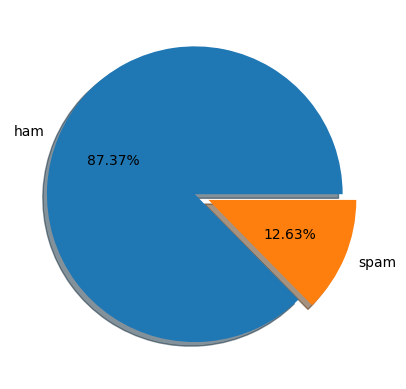

In [59]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.2f%%',explode=[0,0.1],shadow=True)

data is imbalanced as the % of ham is way more than spam

we process the test now using natural language processing

In [62]:
import nltk

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aravi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [65]:
nltk.download('punkt')#for tokenization

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
df['message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

In [70]:
df['message'].apply(len).max()

910

In [71]:
df['no_of_char']=df['message'].apply(len)

In [72]:
df.head()

,target,message,no_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


break text word by word(we can do this also by spliting at puncutations and spaces)

In [74]:
df['message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [75]:
df['noofwords']=df['message'].apply(lambda x:nltk.word_tokenize(x)).apply(len)

In [76]:
df.head()

,target,message,no_of_char,noofwords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [77]:
df['noofsent']=df['message'].apply(lambda x:nltk.sent_tokenize(x)).apply(len)

In [78]:
df.head()

,target,message,no_of_char,noofwords,noofsent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [81]:
df[df['target']==0][['noofwords','no_of_char','noofsent']].mean()

noofwords     17.123782
no_of_char    70.459256
noofsent       1.820195
dtype: float64

for spam

In [82]:
df[df['target']==1][['noofwords','no_of_char','noofsent']].mean()

noofwords      27.667688
no_of_char    137.891271
noofsent        2.970904
dtype: float64

C:\Users\aravi\AppData\Local\Temp\ipykernel_18932\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

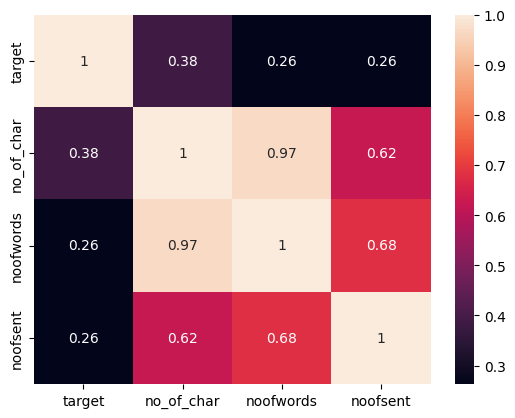

In [84]:
sns.heatmap(df.corr(),annot=True)#we use corr beacuse it shows the relationship between the variables

no_of_char is strongly correlated

preprocessing

Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming(convert dance dancing danced to dance)

we define a function that does all this by itself

In [95]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [116]:
def transform(message):
    message=message.lower()
    message=nltk.word_tokenize(message)
    for i in message:
        if i in nltk.corpus.stopwords.words('english'):
            message.remove(i)
        if i.isalnum()==False:
            message.remove(i)
    message=[ps.stem(word) for word in message]
    return ' '.join(message)

In [117]:
transform("I loved the yt lectures on machine learning. how about you?")

'love yt lectur machin learn how you'

In [118]:
df['new_msg']=df['message'].apply(transform)

In [119]:
df.head()

,target,message,no_of_char,noofwords,noofsent,new_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail in bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah do think goe usf he live around though


we use wordcloud(it gives more weightage to the words that are used to detect if it is a spam or not)

In [122]:
from wordcloud import WordCloud

In [123]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [130]:
spam_wc=wc.generate(df[df['target']==1]['new_msg'].str.cat(sep=' '))

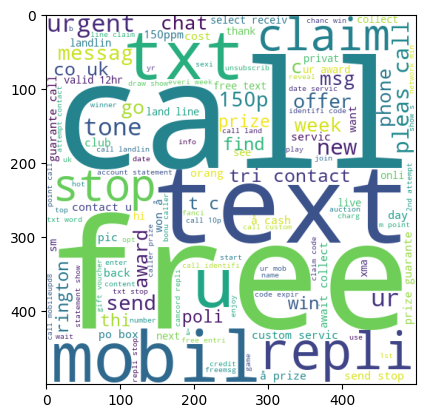

In [131]:
plt.imshow(spam_wc)

In [132]:
ham_wc=wc.generate(df[df['target']==1]['new_msg'].str.cat(sep=' '))

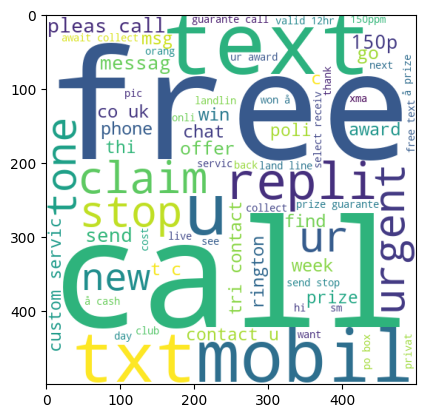

In [133]:
plt.imshow(ham_wc)

model creation

we use naive bayers as for textual data naive bayers is the best algorithm

In [134]:
df.head()

,target,message,no_of_char,noofwords,noofsent,new_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail in bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah do think goe usf he live around though


now inorder to provide input to model we use bag of words(word to vector) concept as input given to a model should not be string

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [137]:
x=cv.fit_transform(df['new_msg']).toarray()

In [143]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [138]:
x.shape

(5169, 7055)

In [144]:
y=df['target'].values#we are using values because it will give us the array

In [145]:
print(y)

[0 0 1 ... 0 0 0]


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [153]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [150]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [151]:
gnb.fit(x_train,y_train)

GaussianNB()

In [152]:
y_pred=gnb.predict(x_train)

In [156]:
train_accuracy=accuracy_score(y_train,y_pred)

In [157]:
print(train_accuracy)

0.9356711003627569


In [158]:
y_pred1=gnb.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred1)
print(test_accuracy)

0.8781431334622823


In [159]:
print(confusion_matrix(y_test,y_pred1))

[[782 107]
 [ 19 126]]


In [160]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       889
           1       0.54      0.87      0.67       145

    accuracy                           0.88      1034
   macro avg       0.76      0.87      0.80      1034
weighted avg       0.92      0.88      0.89      1034



In [166]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_train)
train_accuracy=accuracy_score(y_train,y_pred)
print(train_accuracy)

0.9915356711003628


In [167]:
y_pred2=mnb.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred2)
print(test_accuracy)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.97678916827853
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.91      0.92      0.92       145

    accuracy                           0.98      1034
   macro avg       0.95      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034

[[876  13]
 [ 11 134]]


we got highest accuracy in mnb(0.97678916827853)

In [168]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_train)
train_accuracy=accuracy_score(y_train,y_pred)
print(train_accuracy)

0.9818621523579202


In [169]:
y_pred3=bnb.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred3)
print(test_accuracy)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9748549323017408
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.85      0.90       145

    accuracy                           0.97      1034
   macro avg       0.97      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034

[[885   4]
 [ 22 123]]


now we create files using pickle

In [170]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))